# Dust Attenuation Curves

We implement a whole suite of different attenuation curves in synthesizer, including the following:

- ``PowerLaw``: A power-law attenuation curve.
- ``Calzetti2000``: The [Calzetti (Calzetti et al. 2000)](https://ui.adsabs.harvard.edu/abs/2000ApJ...533..682C/abstract) attenuation curve (with an optional UV bump from [Noll et al. 2009](https://ui.adsabs.harvard.edu/abs/2009A%26A...507.1793N/abstract)).
- ``MWN18``: A Milky Way attenuation curve, defined in [Narayanan et al. 2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...869...70N/abstract).
- ``GrainsWD01``: A dust grain attenuation curve from [Weingarter and Draine 2001](https://ui.adsabs.harvard.edu/abs/2001ApJ...548..296W/abstract) with models for the Milky Way, LMC, and SMC (and more defined in WD01).
- ``ParametricLi08``: A parametric and empirically derived attenuation curve implemented in [Li et al. 2008](https://ui.adsabs.harvard.edu/abs/2008arXiv0808.4123L/abstract), including parameters from [Markov et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A%26A...679A..12M/abstract) and [Markov et al. 2024](https://ui.adsabs.harvard.edu/abs/2024arXiv240205996M/abstract) extending it to $z=12$.

These attenuation curves can be instantiated directly, or attached to an [EmissionModel](../emission_models/emission_models.rst) to be used in the generation of complex spectra from a galaxy or galaxy component.

Each model has unique arguments required at instantiation, but all have the same base methods, such as ``get_transmission`` (which requires an optical depth (``tau_v``) and a wavelength array). Below, we show how to instantiate each of these models and plot their transmission and attenuation curves.

We first define a wavelength array up front:

In [1]:
import numpy as np
from unyt import Angstrom

lams = np.logspace(2, 4, 1000) * Angstrom

## PowerLaw

A ``PowerLaw`` only requires a slope to be defined.
We can then use the in-built methods, e.g. ``get_transmission``, to return the transmission over our wavelength array values.

In [2]:
from synthesizer.emission_models.attenuation import PowerLaw

power_law = PowerLaw(-1.0)

pl_trans = power_law.get_transmission(0.33, lams)

Below we plot the transmission and attenuation curves.

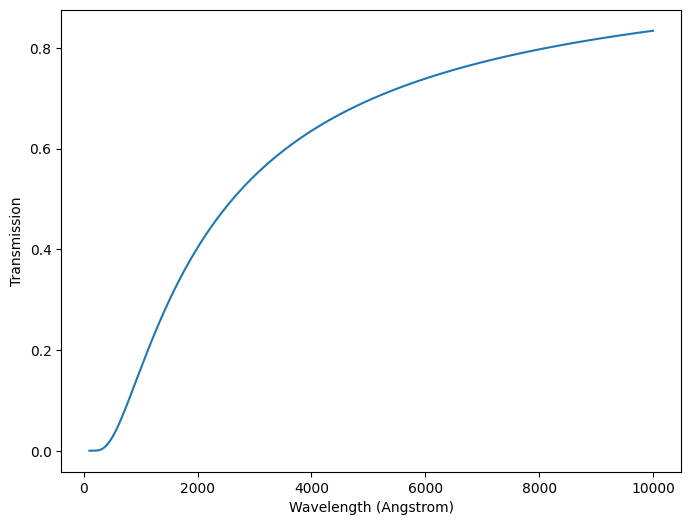

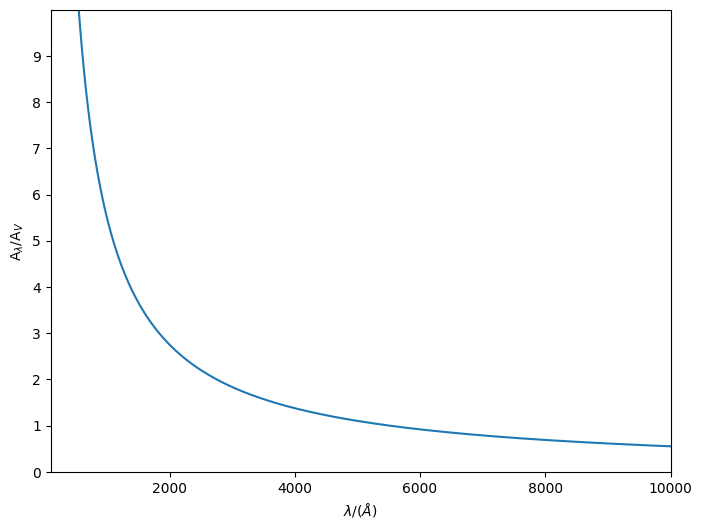

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='$\\lambda/(\\AA)$', ylabel='A$_{\\lambda}/$A$_{V}$'>)

In [3]:
power_law.plot_transmission(0.33, lams, show=True)
power_law.plot_attenuation(lams, show=True)

## Calzetti2000

The ``Calzetti2000`` model requires a slope (``slope``), central wavelength of the UV bump (``cent_lam``), amplitude of the UV bump (``ampl``), and the FWHM of the UV bump (``gamma``). These default to 0.0, 0.2175 microns, 0, and 0.035, respectively. We plot the transmission curve both with the defaults and a non-zero bump amplitude.

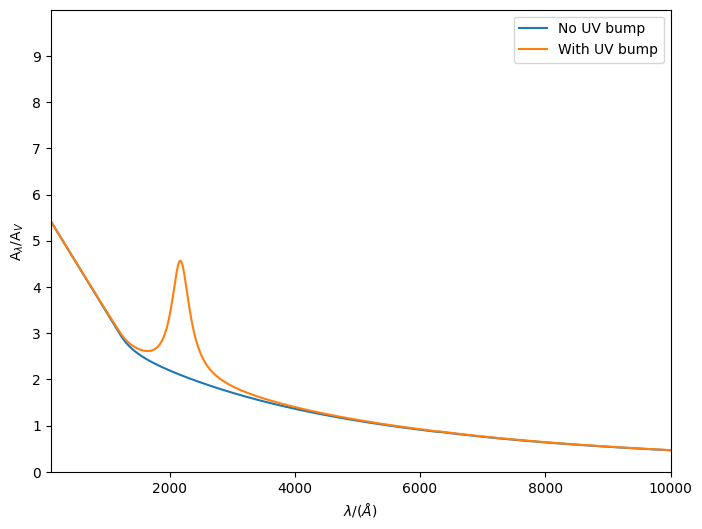

In [4]:
from synthesizer.emission_models.attenuation import Calzetti2000

no_bump = Calzetti2000()
with_bump = Calzetti2000(ampl=10.0)

fig, ax = no_bump.plot_attenuation(lams, show=False, label="No UV bump")
_, _ = with_bump.plot_attenuation(
    lams, fig=fig, ax=ax, show=True, label="With UV bump"
)

## MWN18

The ``MWN18`` model loads a data file included with synthesizer; as such, it requires no arguments.

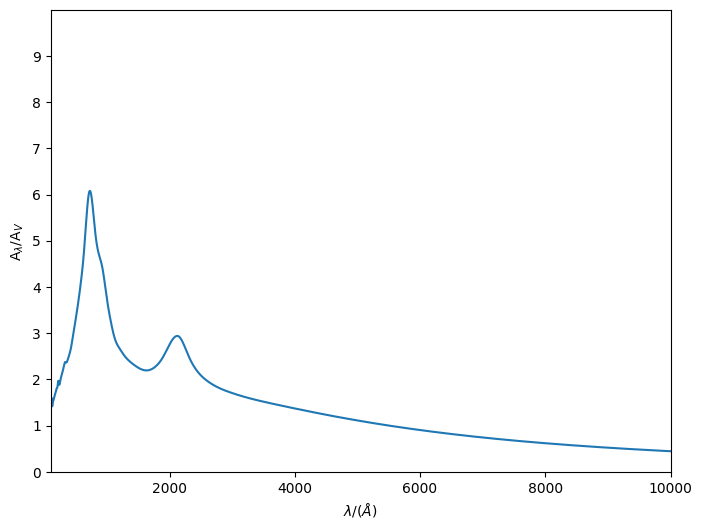

In [5]:
from synthesizer.emission_models.attenuation import MWN18

mwn18 = MWN18()

_, _ = mwn18.plot_attenuation(lams, show=True)

## GrainsWD01

``GrainsWD01`` requires the model to be defined (either ``'MW'``, ``'LMC'``, or ``'SMC'``), and uses the [dust_extinction module](https://dust-extinction.readthedocs.io/en/latest/#) to load the appropriate model.

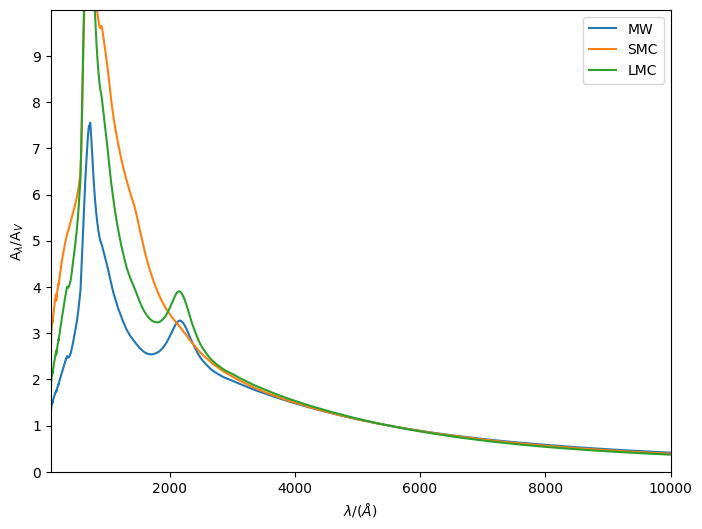

In [6]:
from synthesizer.emission_models.attenuation import GrainsWD01

mw = GrainsWD01("MW")
smc = GrainsWD01("SMC")
lmc = GrainsWD01("LMC")

fig, ax = mw.plot_attenuation(lams, show=False, label="MW")
_, _ = smc.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="SMC")
_, _ = lmc.plot_attenuation(lams, fig=fig, ax=ax, show=True, label="LMC")

## ParametricLi08

The ``ParametricLi08`` model requires the UV slope (``UV_slope``, default 1.0), the optical to Near Infrared slope (``OPT_NIR_slope``, default 1.0), the Far UV slope (``FUV_slope``, default 1.0), and a dimensionless parameter between 0 and 1 controlling the strength of the UV bump (``bump``, default 0.0). Alternatively, a model string can be passed to adopt a preset model (possible values: ``"MW"``, ``"LMC"``, ``"SMC"``, or ``Calzetti``).

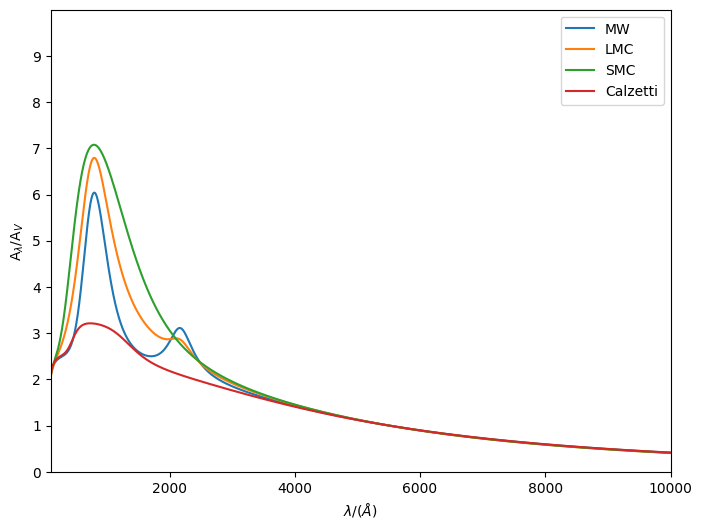

In [7]:
from synthesizer.emission_models.attenuation import ParametricLi08

mw_li08 = ParametricLi08(model="MW")
lmc_li08 = ParametricLi08(model="LMC")
smc_li08 = ParametricLi08(model="SMC")
calz_li08 = ParametricLi08(model="Calzetti")

fig, ax = mw_li08.plot_attenuation(lams, show=False, label="MW")
_, _ = lmc_li08.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="LMC")
_, _ = smc_li08.plot_attenuation(lams, fig=fig, ax=ax, show=False, label="SMC")
_, _ = calz_li08.plot_attenuation(
    lams, fig=fig, ax=ax, show=True, label="Calzetti"
)